         date                                      cookie     cost
0  2023-06-29  csrftoken=8h2Ll3R5bskusVEiWmejefbw7TdUuNxh  0.51216
1  2023-07-03  csrftoken=8h2Ll3R5bskusVEiWmejefbw7TdUuNxh  1.77246
                                       cookie  average_cost
0  csrftoken=8h2Ll3R5bskusVEiWmejefbw7TdUuNxh       1.14231
Weekly cost for a single user: $7.996169999999999
Monthly cost for a single user: $34.2693
Weekly cost for 2000 users: $15992.339999999998
Monthly cost for 2000 users: $68538.6
Weekly cost for 5000 users: $39980.85
Monthly cost for 5000 users: $171346.5
Weekly cost for 10000 users: $79961.7
Monthly cost for 10000 users: $342693.0


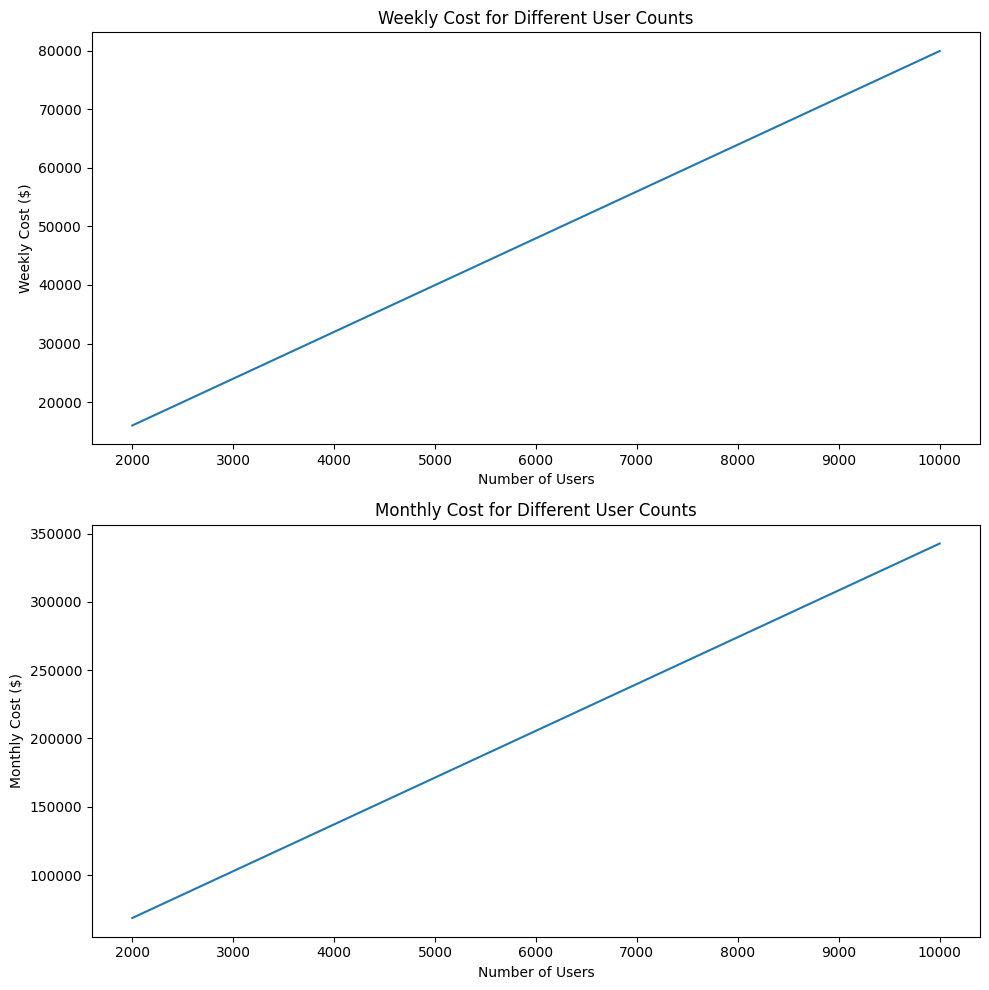

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('log.csv')

# Parse the timestamp to datetime and extract the date
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date

# Add a 'cost' column (assuming a cost of $0.06 per 1000 tokens)
data['cost'] = data['tokens'] / 1000 * 0.06

# Group the data by 'date' and sum the 'cost' values for each date
grouped = data.groupby(['date', 'cookie'])['cost'].sum().reset_index()

# Show the total cost per user and date
print(grouped)

# Calculate the average cost per user per day
average_user_cost = grouped.groupby('cookie')['cost'].mean().reset_index()
average_user_cost.columns = ['cookie', 'average_cost']
print(average_user_cost)

# Assuming that each user interacts with the chatbot once per day
interactions_per_day = 1

# Convert interactions per day to interactions per week and per month
interactions_per_week = interactions_per_day * 7
interactions_per_month = interactions_per_day * 30

# Calculate the total cost per week and per month for a single user
week_cost_single = average_user_cost['average_cost'].mean() * interactions_per_week
month_cost_single = average_user_cost['average_cost'].mean() * interactions_per_month

print(f'Weekly cost for a single user: ${week_cost_single}')
print(f'Monthly cost for a single user: ${month_cost_single}')

# Now scale these costs for 2000, 5000, and 10000 users
user_counts = [2000, 5000, 10000]
for count in user_counts:
    print(f'Weekly cost for {count} users: ${week_cost_single * count}')
    print(f'Monthly cost for {count} users: ${month_cost_single * count}')

# Create a dataframe to store these values
df = pd.DataFrame({
    'users': user_counts,
    'weekly_cost': [week_cost_single * count for count in user_counts],
    'monthly_cost': [month_cost_single * count for count in user_counts],
})

# Plot the data
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Weekly cost
ax[0].plot(df['users'], df['weekly_cost'])
ax[0].set_xlabel('Number of Users')
ax[0].set_ylabel('Weekly Cost ($)')
ax[0].set_title('Weekly Cost for Different User Counts')

# Monthly cost
ax[1].plot(df['users'], df['monthly_cost'])
ax[1].set_xlabel('Number of Users')
ax[1].set_ylabel('Monthly Cost ($)')
ax[1].set_title('Monthly Cost for Different User Counts')

plt.tight_layout()
plt.show()


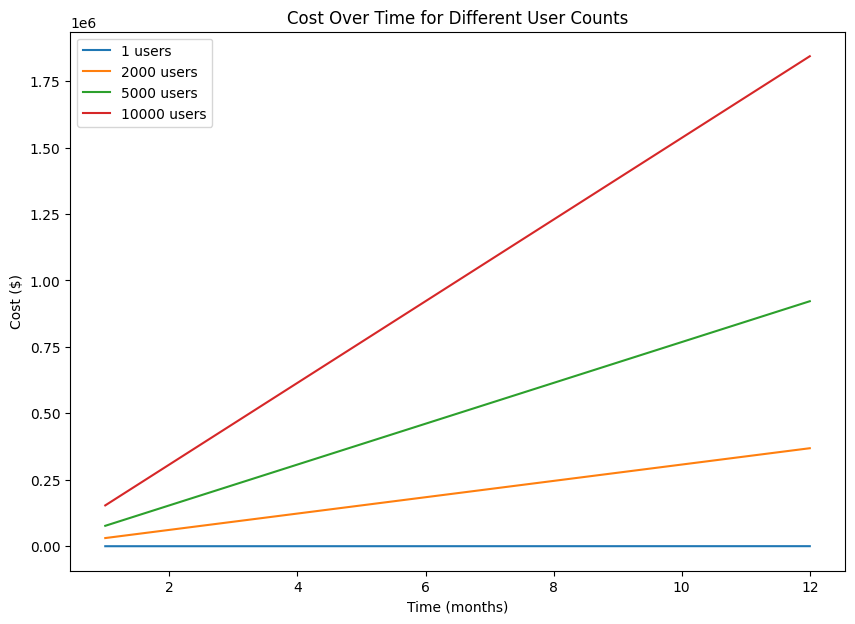

In [4]:
# import numpy as np
# # Define the range of months for which you want to plot the data
# months = np.arange(1, 13)  # From 1 month to 12 months

# # Calculate the total cost for each month for a single user
# cost_per_month_single = average_user_cost * interactions_per_month
# cost_over_time_single = cost_per_month_single * months

# # Calculate the total cost for each month for 2000, 5000, and 10000 users
# user_counts = [1, 2000, 5000, 10000]
# cost_over_time_all_users = [cost_over_time_single * count for count in user_counts]

# # Create a plot
# plt.figure(figsize=(10, 7))

# # Plot the data for each user count
# for i in range(len(user_counts)):
#     plt.plot(months, cost_over_time_all_users[i], label=f'{user_counts[i]} users')

# # Configure the plot
# plt.xlabel('Time (months)')
# plt.ylabel('Cost ($)')
# plt.title('Cost Over Time for Different User Counts')
# plt.legend()

# # Display the plot
# plt.show()